# 패키지 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib import rc
import matplotlib

# # 한글 폰트 설정
# plt.rcParams['font.family'] = 'D2Coding'  # 사용할 한글 폰트 이름 설정
# plt.rcParams['axes.unicode_minus'] = False  # '-' 기호가 정상적으로 표시되도록 설정

# 구글 드라이브 마운트 및 YELP 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# tar 파일 형태로 되어있는 상태
import tarfile

# 압축 해제 경로
path = '/content/drive/MyDrive/Woowahan Proj/yelp_dataset.tar'

# 압축 해제
tar = tarfile.open(path)
tar.extractall()
tar.close

<bound method TarFile.close of <tarfile.TarFile object at 0x787bc922b0d0>>

# EDA

## yelp_academic_dataset_business.json

In [ ]:
# 불러오기

business_path = '/content/yelp_academic_dataset_business.json'
df_business = pd.read_json(business_path, lines=True)
  # lines=True: json 파일이 한 줄에 하나의 객체가 있을 때 사용. 각 줄을 json객체로 인식하여 df로 변경함.

In [ ]:
# 해당 df의 기본 정보 확인
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [ ]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


### 도시-평균평점, 도시-평균리뷰수

In [ ]:
# 도시 별 평균 평점과 평균 리뷰 수 계산
city_stats = df_business.groupby('city').agg({  # agg() 메서드를 활용하여 각 그룹에 대한 평균을 계산
    'stars': 'mean',
    'review_count': 'mean'
}).reset_index()  # .reset_index(): groupby 이후 인덱스 변경의 가능성이 존재하므로, 이를 초기화하여 인덱스를 생성함

# 평균 리뷰 수 기준으로 order by
city_stats = city_stats.sort_values(by='review_count', ascending = False)

In [ ]:
print(city_stats)

                         city  stars  review_count
205   Clearwater/ Countryside   4.00         392.0
1169           Tarpon springs   3.50         389.0
295                East Falls   4.50         361.0
973                  ST LOUIS   3.50         320.0
794       North Redington Bch   4.25         304.0
...                       ...    ...           ...
690                    Monroe   3.00           5.0
682                   Meterie   4.50           5.0
675                 Meridian    3.50           5.0
1177               Thonosassa   4.00           5.0
1053         South Lake Tahoe   5.00           5.0

[1416 rows x 3 columns]


In [ ]:
# csv 출력
csv_file_path = '/content/drive/MyDrive/Woowahan Proj/city_stats.csv'
city_stats.to_csv(csv_file_path, index=False)

print(f'csv 파일이 성공적으로 저장되었습니다: {csv_file_path}')

csv 파일이 성공적으로 저장되었습니다: /content/drive/MyDrive/Woowahan Proj/city_stats.csv


* csv 파일로 확인한 결과
  * max(stars) = 5
  * min(stars) = 1
  * max(review_count) = 392
  * min(review_count) = 5

### 범주화

In [ ]:
# 평균 평점 별 범주화

## 도시별 평균 평점 계산
city_stats = df_business.groupby('city').agg({
    'review_count': 'mean',    # 평균 리뷰 수 계산
    'stars': 'mean'            # 평균 평점 계산
}).reset_index()

## 평균 평점 범주화
star_bins = [0, 1, 2, 3, 4, 5]
star_labels = ['0점대', '1점대', '2점대', '3점대', '4점대']

## 개수 세기
city_stats['stars_category'] = pd.cut(city_stats['stars'], bins=star_bins, labels=star_labels, right = False)
stars_count = city_stats['stars_category'].value_counts().sort_index()

## 결과 출력
print(stars_count)

stars_category
0점대      0
1점대     44
2점대    150
3점대    793
4점대    348
Name: count, dtype: int64


In [ ]:
## 평균 계산
city_stats = df_business.groupby('city').agg({
    'review_count': 'mean',    # 평균 리뷰 수 계산
    'stars': 'mean'            # 평균 평점 계산
}).reset_index()

## 평균 리뷰 별 범주화
review_bins = [0, 50, 100, 200, 300, float('inf')]
review_labels = ['50개 미만', '50-99개', '100-199개', '200-299개', '300개 이상']

## 개수 세기
city_stats['review_category'] = pd.cut(city_stats['review_count'], bins=review_bins, labels=review_labels, right = False)
review_count = city_stats['review_category'].value_counts().sort_index()

## 결과 출력
print(review_count)

review_category
50개 미만      1251
50-99개       123
100-199개      34
200-299개       3
300개 이상        5
Name: count, dtype: int64


In [ ]:
# 평균 평점 범주화 후 카테고리 열 추가
bins = [1, 2, 3, 4, 5]
labels = ['1.x', '2.x', '3.x', '4.x']
city_stats['stars_category'] = pd.cut(city_stats['stars'], bins=bins, labels=labels, right = False)

# 각 평균 평점 그룹별 평균 리뷰 개수 계산
avg_review_count_by_stars = city_stats.groupby('stars_category')['review_count'].mean()

# 결과 출력
print(avg_review_count_by_stars)

stars_category
1.x    15.556818
2.x    21.169668
3.x    29.871384
4.x    32.497942
Name: review_count, dtype: float64


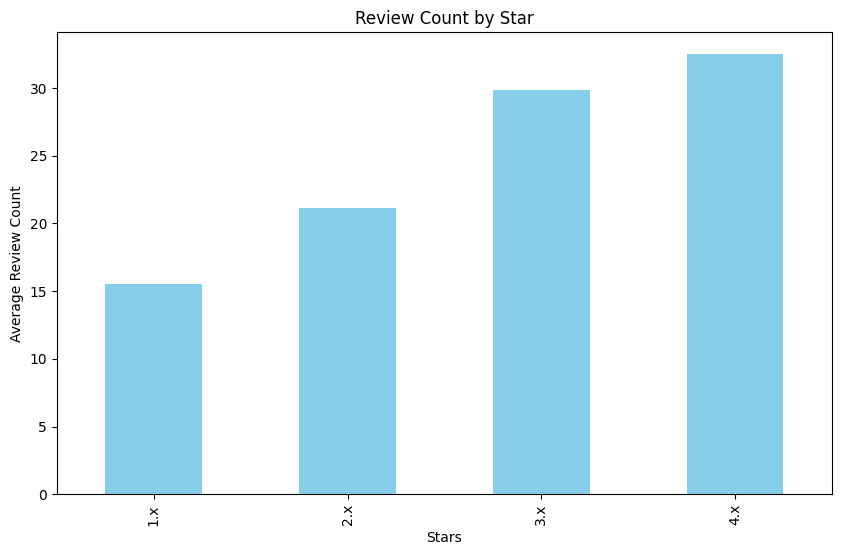

In [ ]:
# 그래프 출력
plt.figure(figsize = (10, 6))
avg_review_count_by_stars.plot(kind = 'bar', color='skyblue')
plt.xlabel('Stars')
plt.ylabel('Average Review Count')
plt.title('Review Count by Star')
plt.show()

* 리뷰의 개수가 많아질수록 평균 평점이 올라가는 형태

## yelp_academic_dataset_tip.json + business join

In [ ]:
# 파일 경로
business_path = '/content/yelp_academic_dataset_business.json'
tip_path = '/content/yelp_academic_dataset_tip.json'

# 파일 불러오기
df_business = pd.read_json(business_path, lines=True)
df_tip = pd.read_json(tip_path, lines=True)

# business_id 기준 조인
df_merged = pd.merge(df_business, df_tip, on='business_id', how='left')

# 결과 출력
print(df_merged.head())

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  tUFrWirKiKi_TAnsVWINQQ                    Target   
4  tUFrWirKiKi_TAnsVWINQQ                    Target   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3             5255 E Broadway Blvd         Tucson    AZ       85711   
4             5255 E Broadway Blvd         Tucson    AZ       85711   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  32.2232

### 팁 개수별 그룹화

In [ ]:
# 각 비즈니스가 받은 팁의 개수 계산 및 내림차순
tip_count_by_biz = df_merged.groupby('name')['text'].count().sort_values(ascending=False)

# 상위 10개 비즈니스 출력
print(tip_count_by_biz.head(10))

name
Starbucks                 6793
McDonald's                3114
Café Du Monde             2571
Dunkin'                   1741
Chick-fil-A               1637
Chipotle Mexican Grill    1470
Whole Foods Market        1469
Panera Bread              1425
Taco Bell                 1396
Wawa                      1363
Name: text, dtype: int64


In [ ]:
# 각 비즈니스 별 최대 팁, 최소 팁, 평균 팁 개수 구하기
tip_counts = df_merged.groupby('business_id')['text'].count()
max_tips = tip_counts.max()
min_tips = tip_counts.min()
avg_tips = tip_counts.mean()

print('최대 팁 개수:', max_tips)
print('최소 팁 개수:', min_tips)
print('평균 팁 개수:', avg_tips)

최대 팁 개수: 2571
최소 팁 개수: 0
평균 팁 개수: 6.045488406741782


* 같은 체인, 다른 지역에 위치한 음식점 사이에서도 평점이 갈릴듯
  * 지역 사이 차이점을 알 수 있을까?


In [ ]:
# tip 개수별 그룹화 후 개수 출력
tip_groups = pd.cut(tip_counts, bins=[0, 100, 200, 300, 400, 500, float('inf')], right = False, labels=['0-99', '100-199', '200-299', '300-399', '400-499', '500-'])
tip_group_counts = tip_groups.value_counts().sort_index()

print(tip_group_counts)

text
0-99       149602
100-199       601
200-299        88
300-399        29
400-499         8
500-           18
Name: count, dtype: int64


* 평균 팁 개수가 8.6개인 것을 간과한 채 나눈 결과

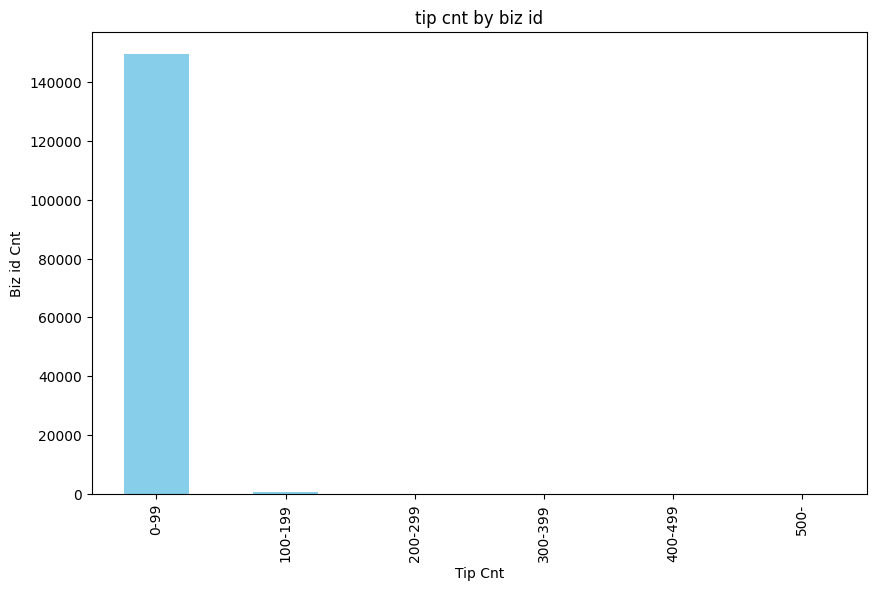

In [ ]:
# 그래프 출력
plt.figure(figsize = (10, 6))
tip_group_counts.plot(kind = 'bar', color='skyblue')
plt.xlabel('Tip Cnt')
plt.ylabel('Biz id Cnt')
plt.title('tip cnt by biz id')
plt.show()

### 팁 유무

In [ ]:
# 팁의 유무 확인
df_merged['has_tip'] = ~df_merged['text'].isnull()  # 'text' 열이 NaN이 아닌 경우에는 팁이 있는 것으로 간주하여 True로 설정

# business_id 별로 팁이 있는지 여부(T/F)를 계산
tip_exists = df_merged.groupby('business_id')['text'].apply(lambda x: 'T' if x.notnull().any() else 'F')

# 결과 출력
print(tip_exists.head())

business_id
---kPU91CF4Lq2-WlRu9Lw    T
--0iUa4sNDFiZFrAdIWhZQ    T
--30_8IhuyMHbSOcNWd6DQ    T
--7PUidqRWpRSpXebiyxTg    T
--7jw19RH9JKXgFohspgQw    F
Name: text, dtype: object


In [ ]:
# 팁 유무 평균 평점 계산
df_merged['has_tip'] = df_merged['text'].notnull()
avg_stars_by_tip = df_merged.groupby('has_tip')['stars'].mean()

# 결과 출력
print(avg_stars_by_tip)

has_tip
False    3.624771
True     3.741070
Name: stars, dtype: float64


## yelp_academic_dataset_user.json

In [ ]:
import pandas as pd


# user.json 파일 경로 설정 (예시)
user_path = '/content/yelp_academic_dataset_user.json'

# user.json 파일을 데이터프레임으로 로드하지 않고, 행의 개수만 확인하기
with open(user_path, 'r', encoding='utf-8') as f:
    num_lines = sum(1 for line in f)

# 결과 출력
print(f"총 행의 개수: {num_lines}")

총 행의 개수: 1987897


In [ ]:
# 파일 경로
user_path = '/content/yelp_academic_dataset_user.json'

# user.json 파일을 데이터프레임으로 로드 (샘플링하여 로드)
df_user = pd.read_json(user_path, lines=True).sample(frac=0.1, random_state=1)  # frac=0.1은 10% 샘플링을 의미합니다.

# 파일 불러오기
df_user = pd.read_json(user_path, lines=True)

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


In [ ]:
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


## yelp_academic_dataset_review.json

In [ ]:
import pandas as pd


# review.json 파일 경로 설정 (예시)
review_path = '/content/yelp_academic_dataset_review.json'

# user.json 파일을 데이터프레임으로 로드하지 않고, 행의 개수만 확인하기
with open(review_path, 'r', encoding='utf-8') as f:
    num_lines = sum(1 for line in f)

# 결과 출력
print(f"총 행의 개수: {num_lines}")

총 행의 개수: 6990280


## 가설: 지역에 따라 같은 프랜차이즈라도 유저의 반응 차이가 존재할 것이다.
* 즉, 같은 name - 다른 business_id (같은 프랜차이즈가 다른 지역에 위치해 있다면 평점에 차이가 존재할 것이다)
* 사람들의 속성 차이가 있을 것이라 생각해서 세운 가설

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
business_path = '/content/yelp_academic_dataset_business.json'
df_business = pd.read_json(business_path, lines=True)

# 데이터 구조 확인
print(df_business.info())

# 중복된 이름의 가게를 가진 데이터 필터링
df_duplicates = df_business[df_business.duplicated(subset=['name'], keep=False)]

# 각 가게의 평점 비교를 위한 데이터 추출
  ## 'Starbucks' 가게의 데이터 추출
starbucks_data = df_duplicates[df_duplicates['name'] == 'Starbucks']

# 다른 위치의 Starubucks 평점 비교
starbucks_grouped = starbucks_data.groupby('city').agg({
    'stars': 'mean',
    'review_count': 'mean'
}).reset_index()

# # 시각화: 평점 비교
# plt.figure(figsize=(10, 6))
# sns.barplot(x='city', y='stars', data=starbucks_grouped)
# plt.title('Average Stars of Starbucks Across Different Cities')
# plt.xlabel('City')
# plt.ylabel('Average Stars')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB
None


* 평점의 차이가 큰 곳들의 tip, review를 살펴보면..? 유의미한 결과가 있을지도?

### 스타벅스

In [ ]:
# 데이터 불러오기
business_path = '/content/yelp_academic_dataset_business.json'
df_business = pd.read_json(business_path, lines=True)

# 스타벅스 데이터 추출
starbucks_data = df_business[df_business['name'] == 'Starbucks']

# 각 가게의 평균 평점 계산
starbucks_avg_stars = starbucks_data.groupby('business_id').agg({
    'stars': 'mean',
    'latitude': 'mean',
    'longitude': 'mean'
}).reset_index()

# 평점 기준 높은 곳 5곳
top_5_starbucks = starbucks_avg_stars.nlargest(5, 'stars')

# 평점 기준 낮은 곳 5곳
bottom_5_starbucks = starbucks_avg_stars.nsmallest(5, 'stars')

# 결과 출력
print("평점 기준 높은 곳 5곳:")
print(top_5_starbucks[['business_id','stars','latitude','longitude']])
print("\n평점 기준 낮은 곳 5곳:")
print(bottom_5_starbucks[['business_id','stars','latitude','longitude']])


평점 기준 높은 곳 5곳:
                business_id  stars   latitude   longitude
175  FYs3jIvpxRCeTHMn2nOWDQ    5.0  39.465755 -119.778950
211  HlaqPcOkOb7AjLpYU5fsoA    5.0  31.900935 -110.992529
297  OI_A8VRmMVxIq_ZeNaLVeg    5.0  43.646893 -116.353767
327  RXhvlDppMyw6vhTxQX5kSw    5.0  39.799497  -86.261058
545  igQDFfrOhici5tlZ3JkNhg    5.0  28.189560  -82.618103

평점 기준 낮은 곳 5곳:
                business_id  stars   latitude  longitude
234  J8on84cuYSeLXYuzgc9xJA    1.0  27.767935 -82.393543
497  eYF-P4Dp7zHH1o2cEV39Ug    1.0  39.662164 -75.691185
506  exrvCKEGg1Ays38rKLOdhA    1.0  38.742220 -90.364130
41   2rnDTrLx9yiWnfDX2P3EFg    1.5  39.966751 -75.302218
43   2u0mmUtcEdvgeioiGE730w    1.5  36.031648 -86.787471


#### 지도로 시각화

In [ ]:
# 지도 패키지
import folium
from folium.plugins import MarkerCluster

# 지도 초기화
map_center = [starbucks_avg_stars['latitude'].mean(), starbucks_avg_stars['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# 상위 5개와 하위 5개의 스타벅스 위치를 지도에 추가
for index, row in top_5_starbucks.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['business_id']} - 평점: {row['stars']:.2f}",
        icon=folium.Icon(color='blue', icon='coffee')
    ).add_to(mymap)

for index, row in bottom_5_starbucks.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['business_id']} - 평점: {row['stars']:.2f}",
        icon=folium.Icon(color='red', icon='coffee')
    ).add_to(mymap)

# 지도 출력
mymap.save('top_bottom_starbucks_map.html')
mymap

ㅎ 차이가 없는 것 같음

#### 상위5개/하위5개 스타벅스의 평균 평점, 리뷰 개수

In [ ]:
# 각 가게의 평균 평점 및 리뷰 개수 계산
starbucks_avg_review_stars = starbucks_data.groupby('business_id').agg({
    'stars': 'mean',
    'review_count': 'sum'
}).reset_index()


# 평점 기준으로 정렬하여 가장 높은 5곳과 낮은 5곳 추출
top_5_starbucks = starbucks_avg_stars.nlargest(5, 'stars')
bottom_5_starbucks = starbucks_avg_stars.nsmallest(5, 'stars')

# 리뷰 개수가 없는 경우 0으로 처리
starbucks_avg_review_stars['review_count'].fillna(0, inplace=True)

print("상위 5개 스타벅스 가게:")
print(top_5_starbucks[['business_id', 'stars', 'review_count']])
print("\n하위 5개 스타벅스 가게:")
print(bottom_5_starbucks[['business_id', 'stars', 'review_count']])

### 맥도날드

In [ ]:
import pandas as pd

# 비즈니스 데이터셋 불러오기
business_file_path = '/content/yelp_academic_dataset_business.json'
df_business = pd.read_json(business_file_path, lines=True)

# 맥도날드(McDonald's) 가게 데이터 추출
mcdonalds_data = df_business[df_business['name'] == "McDonald's"]

# 맥도날드 가게들의 평균 평점 계산
mcdonalds_avg_stars = mcdonalds_data.groupby('business_id').agg({
    'stars': 'mean',
    'review_count': 'sum'
}).reset_index()

# 평점 기준으로 정렬하여 가장 높은 5곳과 낮은 5곳 추출
top_5_mcdonalds = mcdonalds_avg_stars.nlargest(5, 'stars')
bottom_5_mcdonalds = mcdonalds_avg_stars.nsmallest(5, 'stars')

print("상위 5개 맥도날드 가게:")
print(top_5_mcdonalds[['business_id', 'stars', 'review_count']])
print("\n하위 5개 맥도날드 가게:")
print(bottom_5_mcdonalds[['business_id', 'stars', 'review_count']])

상위 5개 맥도날드 가게:
                business_id  stars  review_count
151  BcyHAag7lr2bVZGNW4u1dA    4.0             9
268  NGK31ST2C3sT1uwNtAeFdw    4.0             5
416  ayqh0cxxuLrnY55oZr0kkA    4.0            12
282  Ov8-eg1-2S9a1PpuYRVLTQ    3.5             8
288  PN63nkTW7UBPeVTMZZ8blg    3.5            12

하위 5개 맥도날드 가게:
               business_id  stars  review_count
0   -7Rx5jVeQmlVoAU_oXrzew    1.0            11
2   -YljbQMbbTC9jwn8kOLitA    1.0            37
6   03YfclexPdS_yrIbU6ahaA    1.0             9
11  0UYn-R_LF-V0KSlYFRi3PA    1.0            21
15  1Jo4UC0YNPoPm9Gfur8tQA    1.0            39


* 맥도날드는 stars가 4.5, 5.0은..? 없나?

In [ ]:
# 평점이 4.5 이상인 맥도날드 가게 필터링
mcdonalds_high_stars = mcdonalds_data[(mcdonalds_data['stars'] >= 4.5)]

# 결과 출력
print("평점이 4.5 이상인 맥도날드 가게:")
print(mcdonalds_high_stars[['business_id', 'name', 'stars', 'review_count']])

평점이 4.5 이상인 맥도날드 가게:
Empty DataFrame
Columns: [business_id, name, stars, review_count]
Index: []


In [ ]:
import pandas as pd
import folium

# 평균 평점과 리뷰 개수를 계산하여 새로운 데이터프레임 생성
mcdonalds_avg_stars = mcdonalds_data.groupby('business_id').agg({
    'stars': 'mean',
    'latitude': 'mean',
    'longitude': 'mean',
    'review_count': 'sum'
}).reset_index()

# 평점 기준으로 정렬하여 상위 5개와 하위 5개 추출
top_5_mcdonalds = mcdonalds_avg_stars.nlargest(5, 'stars')
bottom_5_mcdonalds = mcdonalds_avg_stars.nsmallest(5, 'stars')

# 지도 초기 설정
map_center = [mcdonalds_avg_stars['latitude'].mean(), mcdonalds_avg_stars['longitude'].mean()]  # 맥도날드 가게들의 평균 위도, 경도를 중심으로 지도 설정
mcdonalds_map = folium.Map(location=map_center, zoom_start=12)  # 초기 지도 중심과 줌 레벨 설정

# 상위 5개 맥도날드 가게를 파란색 마커로 표시
for index, row in top_5_mcdonalds.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Stars: {row['stars']}, Review Count: {row['review_count']}",
                  icon=folium.Icon(color='blue')).add_to(mcdonalds_map)

# 하위 5개 맥도날드 가게를 빨간색 마커로 표시
for index, row in bottom_5_mcdonalds.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Stars: {row['stars']}, Review Count: {row['review_count']}",
                  icon=folium.Icon(color='red')).add_to(mcdonalds_map)

# 지도를 HTML 파일로 저장
mcdonalds_map.save('mcdonalds_map.html')

# 지도를 출력
mcdonalds_map

* 이 가게는 얼마나 최악이길래 저렇게 떨어져 있는데 37개나...
 -YljbQMbbTC9jwn8kOLitA    1.0            37


* 리뷰데이터에서 이것만 뽑아보자

In [ ]:
import pandas as pd

# 리뷰 데이터셋 불러오기
review_path = '/content/yelp_academic_dataset_review.json'
chunk_size = 100000  # 필요에 따라 적절한 chunk 사이즈 지정
review_chunks = pd.read_json(review_path, lines=True, chunksize=chunk_size)

# 해당 business_id의 리뷰 추출
target_business_id = '-YljbQMbbTC9jwn8kOLitA'
reviews = pd.DataFrame()

for chunk in review_chunks:
    target_reviews = chunk[chunk['business_id'] == target_business_id]
    reviews = pd.concat([reviews, target_reviews], ignore_index=True)

# 결과 확인
print(f"{len(reviews)}개의 리뷰가 추출되었습니다.")
print(reviews.head())


40개의 리뷰가 추출되었습니다.
                review_id                 user_id             business_id  \
0  FbGPsxVjpRQv-nZgIMi9qA  XIddzr615OP00vB0TMaxBg  -YljbQMbbTC9jwn8kOLitA   
1  KjjvT2O8lO48_NRFKI24zA  krGNk40uRTn_WZ8mZ3NuAg  -YljbQMbbTC9jwn8kOLitA   
2  Q-n3A6GiRtucYL1xhHFUNg  bqVklo73fnJJJk4q64ZJVw  -YljbQMbbTC9jwn8kOLitA   
3  b7jiWgozv0OAQqNZrZ_X6Q  Wu6_jq3_GYythLISxediPA  -YljbQMbbTC9jwn8kOLitA   
4  kKaqYfk2cdgwXDyk8iYQ1g  zcyFbByUvy9HezjZW6vRlw  -YljbQMbbTC9jwn8kOLitA   

   stars  useful  funny  cool  \
0      1       0      0     1   
1      1       1      0     0   
2      1       0      0     0   
3      1       0      0     0   
4      1       0      0     0   

                                                text                date  
0  Worst McDonald's I've ever encountered. Twice ... 2016-01-17 20:24:31  
1  This is the worst McDonald's ever. Do not come... 2015-02-02 18:59:41  
2  NEVER NEVER NEVER get my order right.  Their m... 2015-12-06 17:12:59  
3  I've had time to 

In [ ]:
reviews[0:39]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,FbGPsxVjpRQv-nZgIMi9qA,XIddzr615OP00vB0TMaxBg,-YljbQMbbTC9jwn8kOLitA,1,0,0,1,Worst McDonald's I've ever encountered. Twice ...,2016-01-17 20:24:31
1,KjjvT2O8lO48_NRFKI24zA,krGNk40uRTn_WZ8mZ3NuAg,-YljbQMbbTC9jwn8kOLitA,1,1,0,0,This is the worst McDonald's ever. Do not come...,2015-02-02 18:59:41
2,Q-n3A6GiRtucYL1xhHFUNg,bqVklo73fnJJJk4q64ZJVw,-YljbQMbbTC9jwn8kOLitA,1,0,0,0,NEVER NEVER NEVER get my order right. Their m...,2015-12-06 17:12:59
3,b7jiWgozv0OAQqNZrZ_X6Q,Wu6_jq3_GYythLISxediPA,-YljbQMbbTC9jwn8kOLitA,1,0,0,0,I've had time to read all of the other reviews...,2018-09-05 00:53:34
4,kKaqYfk2cdgwXDyk8iYQ1g,zcyFbByUvy9HezjZW6vRlw,-YljbQMbbTC9jwn8kOLitA,1,0,0,0,Don't know why I ever come back here. The driv...,2015-03-09 13:04:51
5,np3fRGCg8bOPlI6lRZPBrw,0nhxvk1nSpgCSmW0llEP1w,-YljbQMbbTC9jwn8kOLitA,1,0,0,0,Terribly slow and got the order wrong. How har...,2018-05-13 15:36:14
6,2QlBPgHncOQhjIsx660zzA,h5KptTd7ykKji_rkYmc5ew,-YljbQMbbTC9jwn8kOLitA,1,0,0,0,This is the worst McDonald's I have ever heard...,2016-07-30 02:32:42
7,WgvRTEL0c9wYPLX6-zKbiA,70r1ukQdLsoNx7U94Tl6cA,-YljbQMbbTC9jwn8kOLitA,1,0,0,0,Just like everybody else the same customer ser...,2016-09-24 16:08:19
8,V8URlqN29cR7PWA6pQKcGA,6w0tVAkJDLjWTj4733mhag,-YljbQMbbTC9jwn8kOLitA,1,0,0,0,This is a restaurant filled with rude employee...,2018-09-21 03:46:09
9,_Idq6S8BPbAERCRqrILJRw,rapL09z1wYmnVBTQhQd1UQ,-YljbQMbbTC9jwn8kOLitA,1,0,0,0,Went there for lunch. As I was waiting I notic...,2018-08-10 22:03:53


In [ ]:
import pandas as pd

# 리뷰 데이터셋 불러오기
review_path = '/content/yelp_academic_dataset_review.json'
chunk_size = 100000  # 필요에 따라 적절한 chunk 사이즈 지정
review_chunks = pd.read_json(review_path, lines=True, chunksize=chunk_size)

# 해당 business_id의 리뷰 추출
target_business_id = '1Jo4UC0YNPoPm9Gfur8tQA'
reviews = pd.DataFrame()

for chunk in review_chunks:
    target_reviews = chunk[chunk['business_id'] == target_business_id]
    reviews = pd.concat([reviews, target_reviews], ignore_index=True)

# 결과 확인
print(f"{len(reviews)}개의 리뷰가 추출되었습니다.")
print(reviews.head())


39개의 리뷰가 추출되었습니다.
                review_id                 user_id             business_id  \
0  6sNJxfQgpluKTFx8rT3X8Q  dRElwBvTEm0KKFzZ05JcRA  1Jo4UC0YNPoPm9Gfur8tQA   
1  I6FqbpgFccLreKLXvNqbRA  imqab-QV1jOPP-NdFxIbxw  1Jo4UC0YNPoPm9Gfur8tQA   
2  Eg1IwKnEdu-_kVoiacuf1A  UkV45M5QZCd1oYIucL-Adw  1Jo4UC0YNPoPm9Gfur8tQA   
3  L3z6_E5qgOBay2QJSrBseQ  cLU7BkQk45j9vAPl698wQg  1Jo4UC0YNPoPm9Gfur8tQA   
4  ULCj-whKlejmyQv4-gu4FA  mavkfLzsekjzikS0mZc-Cg  1Jo4UC0YNPoPm9Gfur8tQA   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      1       0      0     0   
2      1       1      0     0   
3      1       1      0     0   
4      2       0      0     0   

                                                text                date  
0  It's McDonald's - what can you say. Fries are ... 2012-05-02 04:21:19  
1  Everytime i run here to get so quick dinner fo... 2017-09-02 22:06:11  
2  Worst McDonalds I have ever been to! For the l... 2014-12-22 04:13:58  
3  THIS IS LITERALLY

In [ ]:
reviews[0:39]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,6sNJxfQgpluKTFx8rT3X8Q,dRElwBvTEm0KKFzZ05JcRA,1Jo4UC0YNPoPm9Gfur8tQA,3,0,0,0,It's McDonald's - what can you say. Fries are ...,2012-05-02 04:21:19
1,I6FqbpgFccLreKLXvNqbRA,imqab-QV1jOPP-NdFxIbxw,1Jo4UC0YNPoPm9Gfur8tQA,1,0,0,0,Everytime i run here to get so quick dinner fo...,2017-09-02 22:06:11
2,Eg1IwKnEdu-_kVoiacuf1A,UkV45M5QZCd1oYIucL-Adw,1Jo4UC0YNPoPm9Gfur8tQA,1,1,0,0,Worst McDonalds I have ever been to! For the l...,2014-12-22 04:13:58
3,L3z6_E5qgOBay2QJSrBseQ,cLU7BkQk45j9vAPl698wQg,1Jo4UC0YNPoPm9Gfur8tQA,1,1,0,0,THIS IS LITERALLY THE WORST MCDONALDS EVER!!!!...,2018-03-18 15:54:42
4,ULCj-whKlejmyQv4-gu4FA,mavkfLzsekjzikS0mZc-Cg,1Jo4UC0YNPoPm9Gfur8tQA,2,0,0,0,Right around the corner from the house. Usuall...,2014-08-06 20:30:43
5,1IyaEauBu-LMyMdEUMF-GA,WzFBXOA0-Vg0PgofCr_etQ,1Jo4UC0YNPoPm9Gfur8tQA,1,0,0,0,the guy taking my order was either an idiot or...,2016-02-20 19:56:52
6,Va9fbkoTSTluIrR_CUJMPQ,A6VnyLW_WOuUXrsZuBdDzw,1Jo4UC0YNPoPm9Gfur8tQA,1,0,0,0,This is the WORST McDonalds I've ever eaten at...,2012-02-26 02:39:25
7,XwZ0oPiFDyjptMq0JCUolQ,2HUzA-XakVzTGzmE9HiGvA,1Jo4UC0YNPoPm9Gfur8tQA,1,1,3,0,I'm McHating it.\n\nI wanted a chicken sandwic...,2010-03-06 20:04:24
8,9O5mEg3LHVwfZteWqJgOSw,NhHt-sqi8bTfQNlc5svZ-Q,1Jo4UC0YNPoPm9Gfur8tQA,1,0,0,0,Mc Donalds in Sun Valley. You can always count...,2020-01-20 07:15:36
9,iaSwyN3jRjehVYEEMIMvHA,8e_4AxSzeowI2yrYrYF8CA,1Jo4UC0YNPoPm9Gfur8tQA,1,0,0,0,what happened to dressing in the uniforms? cus...,2017-12-26 19:48:58


# Review Textmining

## text에 대문자가 3개 이상 연속되는 경우만 남기기

### 패키지, 데이터셋 불러오기

In [ ]:
# 필요한 패키지 불러오기
import json
import random

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import polars  as pl
import pyarrow

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('husl')
sns.set_style("whitegrid")

In [ ]:
# 데이터셋 불러오기
review_df = pl.read_ndjson("/content/yelp_academic_dataset_review.json")
print(review_df.shape)
review_df.head()

(6990280, 9)


review_id,user_id,business_id,stars,useful,funny,cool,text,date
str,str,str,f64,i64,i64,i64,str,str
"""KU_O5udG6zpxOg…","""mh_-eMZ6K5RLWh…","""XQfwVwDr-v0ZS3…",3.0,0,0,0,"""If you decide …","""2018-07-07 22:…"
"""BiTunyQ73aT9WB…","""OyoGAe7OKpv6Sy…","""7ATYjTIgM3jUlt…",5.0,1,0,1,"""I've taken a l…","""2012-01-03 15:…"
"""saUsX_uimxRlCV…","""8g_iMtfSiwikVn…","""YjUWPpI6HXG530…",3.0,0,0,0,"""Family diner. …","""2014-02-05 20:…"
"""AqPFMleE6RsU23…","""_7bHUi9Uuf5__H…","""kxX2SOes4o-D3Z…",5.0,1,0,1,"""Wow! Yummy, d…","""2015-01-04 00:…"
"""Sx8TMOWLNuJBWe…","""bcjbaE6dDog4jk…","""e4Vwtrqf-wpJfw…",4.0,1,0,1,"""Cute interior …","""2017-01-14 20:…"


In [ ]:
# # 샘플링하는 경우

# review_df = review_df.to_pandas()
# review_df = review_df.sample(n=100000)
# print(review_df.shape)
# review_df.head()

### text 필터링 함수 정의

* 대문자 1개는 문장 맨 앞, 2개는 축약형일 때 등의 경우를 생각하면 충분히 가능
* 대문자 3개 이상 연속으로 등장하는 경우를 강조 단어(emphasize word)라고 정의

In [ ]:
# text에 대문자 3개 이상 패턴 필터링

def emphasize_word(text):
  count = 0
  for char in text:
    if char.isupper():
      count += 1
      if count >= 3:
        return True
    else:
      count = 0
  return False

filtered_reviews = review_df.filter(pl.col("text").apply(emphasize_word))

print(filtered_reviews.head())

<ipython-input-39-284f2623b1b7>:14: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  filtered_reviews = review_df.filter(pl.col("text").apply(emphasize_word))


shape: (5, 9)
┌──────────────┬──────────────┬─────────────┬───────┬───┬───────┬──────┬─────────────┬─────────────┐
│ review_id    ┆ user_id      ┆ business_id ┆ stars ┆ … ┆ funny ┆ cool ┆ text        ┆ date        │
│ ---          ┆ ---          ┆ ---         ┆ ---   ┆   ┆ ---   ┆ ---  ┆ ---         ┆ ---         │
│ str          ┆ str          ┆ str         ┆ f64   ┆   ┆ i64   ┆ i64  ┆ str         ┆ str         │
╞══════════════╪══════════════╪═════════════╪═══════╪═══╪═══════╪══════╪═════════════╪═════════════╡
│ JrIxlS1TzJ-i ┆ eUta8W_HdHMX ┆ 04UD14gamNj ┆ 1.0   ┆ … ┆ 2     ┆ 1    ┆ I am a long ┆ 2015-09-23  │
│ Cu79ul40cQ   ┆ PzLBBZhL1A   ┆ LY0IDYVhHJg ┆       ┆   ┆       ┆      ┆ term        ┆ 23:10:31    │
│              ┆              ┆             ┆       ┆   ┆       ┆      ┆ frequent    ┆             │
│              ┆              ┆             ┆       ┆   ┆       ┆      ┆ custom…     ┆             │
│ _ZeMknuYdlQc ┆ yfFzsLmaWF2d ┆ LHSTtnW3YHC ┆ 5.0   ┆ … ┆ 0     ┆ 0    ┆ Amaz

#### csv 파일 저장

In [ ]:
# csv 파일 저장
filtered_reviews_df = filtered_reviews.to_pandas()
filtered_reviews_df.to_csv("/content/filtered_reviews.csv", index = False)
print("CSV 파일이 성공적으로 저장되었습니다.")

CSV 파일이 성공적으로 저장되었습니다.


In [ ]:
# csv 파일 2개로 나누어 저장할 수 있게 분리
filtered_reviews_df = filtered_reviews.to_pandas()

## 데이터를 두 개의 DataFrame으로 나누기
half_size = len(filtered_reviews_df) // 2
part1 = filtered_reviews_df.iloc[:half_size]
part2 = filtered_reviews_df.iloc[half_size:]

## 두 개의 DataFrame을 CSV 파일로 저장
part1.to_csv("/content/filtered_reviews_part1.csv", index=False)
part2.to_csv("/content/filtered_reviews_part2.csv", index=False)

print("두 개의 CSV 파일이 성공적으로 저장되었습니다.")


두 개의 CSV 파일이 성공적으로 저장되었습니다.


In [ ]:
filtered_reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
1,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
2,vBK79c3_1Ff_oqkh5VpfGg,Ohhrhu1RkqfVciIVx_W5HQ,nRKndeZLQ3eDL10UMwS2rQ,5.0,2,5,2,HOLY SMOKES!\n\nactual pumpkin pie mixed in wi...,2009-10-13 19:49:51
3,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4.0,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07
4,xdQe2E8jR6pLA07p1aYtKA,yFuE8SPF-d1GXJUWYgKtzg,X8lfGPagfLzfOsx0k08NRQ,5.0,0,0,0,Took my vehicle here for some work a few years...,2017-05-13 14:15:29


In [ ]:
print(filtered_reviews_df.shape)
print(filtered_reviews_df.info())
print(filtered_reviews_df.head)

(1598809, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598809 entries, 0 to 1598808
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   review_id    1598809 non-null  object 
 1   user_id      1598809 non-null  object 
 2   business_id  1598809 non-null  object 
 3   stars        1598809 non-null  float64
 4   useful       1598809 non-null  int64  
 5   funny        1598809 non-null  int64  
 6   cool         1598809 non-null  int64  
 7   text         1598809 non-null  object 
 8   date         1598809 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 109.8+ MB
None
<bound method NDFrame.head of                       review_id                 user_id  \
0        JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A   
1        _ZeMknuYdlQcUqng_Im3yg  yfFzsLmaWF2d4Sr0UNbBgg   
2        vBK79c3_1Ff_oqkh5VpfGg  Ohhrhu1RkqfVciIVx_W5HQ   
3        lUUhg8ltDsUZ9h0xnwY4Dg  RreNy--tOmXMl1en0wiBOg 

### 시각화

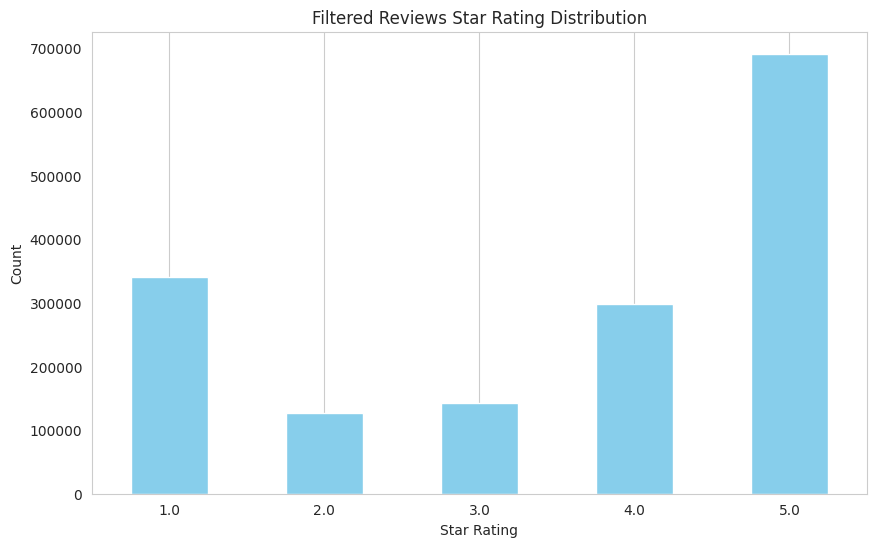

In [ ]:
# 별점(stars)의 분포를 시각화
plt.figure(figsize=(10, 6))
filtered_reviews_df['stars'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Filtered Reviews Star Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
# 필터링된 데이터의 별점 분포를 텍스트로 출력
print("Filtered Reviews Star Rating Distribution (Text):")
print(filtered_reviews_df['stars'].value_counts().sort_index())

Filtered Reviews Star Rating Distribution (Text):
stars
1.0    341078
2.0    127489
3.0    141887
4.0    297237
5.0    691118
Name: count, dtype: int64


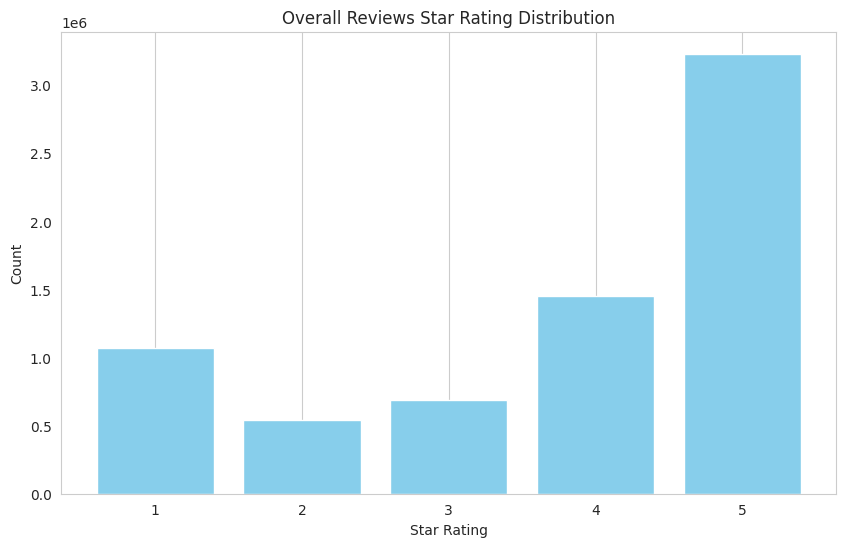

Overall Reviews Star Rating Distribution:
shape: (5, 2)
┌───────┬─────────┐
│ stars ┆ count   │
│ ---   ┆ ---     │
│ f64   ┆ u32     │
╞═══════╪═════════╡
│ 1.0   ┆ 1069561 │
│ 2.0   ┆ 544240  │
│ 3.0   ┆ 691934  │
│ 4.0   ┆ 1452918 │
│ 5.0   ┆ 3231627 │
└───────┴─────────┘


In [ ]:
# 전체 리뷰 별점 분포와 비교

import polars as pl
import matplotlib.pyplot as plt

# 별점(stars)의 분포를 계산
stars_distribution = review_df['stars'].value_counts().sort("stars")

# # 내림차순 정렬
# stars_distribution_pandas = stars_distribution.to_pandas().sort_values(by='st', ascending=False)

# Matplotlib을 사용하여 막대 그래프로 별점 분포 시각화
plt.figure(figsize=(10, 6))
plt.bar(stars_distribution['stars'], stars_distribution['count'], color='skyblue')
plt.title('Overall Reviews Star Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.xticks(stars_distribution['stars'])
plt.grid(axis='y')
plt.show()

# 별점 분포 데이터 출력
print("Overall Reviews Star Rating Distribution:")
print(stars_distribution)

### 차트 비교

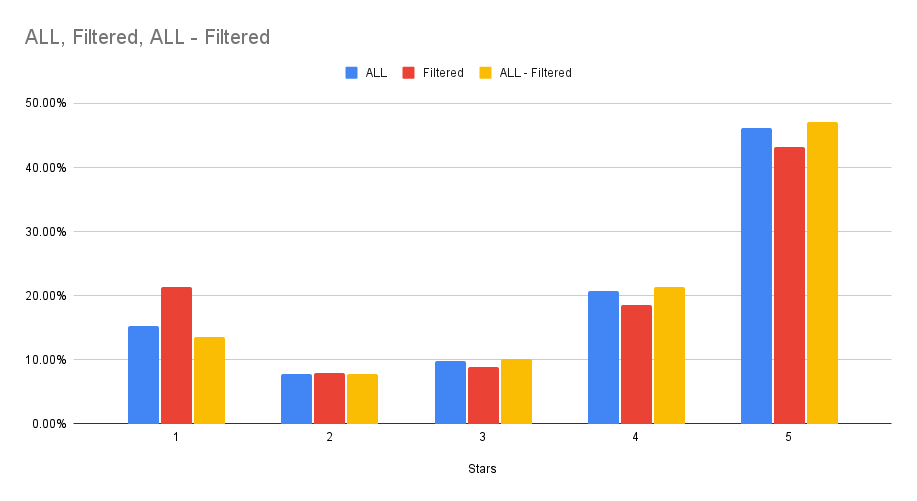

* Stars 2, 3, 4, 5에서는 유의미한 차이가 보이지 않는 듯함.
* 하지만 Stars 1에서는 유의미한 차이가 존재함.
  * Filter를 걸었을 때 (대문자가 연속 3개 이상 존재한다) 부정 리뷰의 비율이 증가하는 것으로 보임
  * 즉, 대문자가 문장에 많으면 부정리뷰일 확률이 높다는 뜻

* 부정 리뷰를 뽑아 보면 유의미한 결과가 나올지도?

## 강조단어(emphasized_words) 출력

#### 전체에서

In [ ]:
import pandas as pd
import polars as pl

review_df = pl.read_ndjson("/content/yelp_academic_dataset_review.json")
review_df = review_df.to_pandas()

# 대문자 패턴을 찾아 새로운 열 추가
pattern = r'([A-Z]{3,})'
# df['emphasized_words'] = df['text'].str.extract(pattern, flags=re.IGNORECASE)
review_df['emphasized_words'] = review_df['text'].str.findall(pattern).apply(lambda x: ', '.join(x))


# 결과 확인
print(review_df.head())

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  \
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11   
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18   
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30   
3  Wow!  Yummy, different,  de

#### filtered_reviews에서만

In [ ]:
import pandas as pd
import polars as pl
import re

# Polars로 데이터 불러오기
review_path = "/content/yelp_academic_dataset_review.json"
review_pl = pl.read_ndjson(review_path)

# Polars 데이터를 Pandas 데이터프레임으로 변환
review_df = review_pl.to_pandas()

# 대문자 패턴을 찾는 함수 정의
def emphasize_word2(text):
    pattern = r'[A-Z]{3,}'
    matches = re.findall(pattern, text)
    return ', '.join(matches)

# 새로운 열 추가: 대문자 패턴 추출
review_df['emphasized_words'] = review_df['text'].apply(emphasize_word2)

# 결과 확인
print(review_df.head())

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  \
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11   
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18   
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30   
3  Wow!  Yummy, different,  de

In [ ]:
# filtered_review에 emphasized_words 추가하기

# pattern 필터링
pattern = r'[A-Z]{3,}'
filtered_review_pl = review_pl.filter(pl.col("text").str.contains(pattern))

# pd 변환
filtered_reviews_df = filtered_review_pl.to_pandas()

# 새로운 열 추가: 대문자 패턴 추출
filtered_reviews_df['emphasized_words'] = filtered_reviews_df['text'].apply(emphasize_word2)

# 결과 출력
print(filtered_reviews_df.head())

                review_id                 user_id             business_id  \
0  JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A  04UD14gamNjLY0IDYVhHJg   
1  _ZeMknuYdlQcUqng_Im3yg  yfFzsLmaWF2d4Sr0UNbBgg  LHSTtnW3YHCeUkRDGyJOyw   
2  vBK79c3_1Ff_oqkh5VpfGg  Ohhrhu1RkqfVciIVx_W5HQ  nRKndeZLQ3eDL10UMwS2rQ   
3  lUUhg8ltDsUZ9h0xnwY4Dg  RreNy--tOmXMl1en0wiBOg  cPepkJeRMtHapc_b2Oe_dw   
4  xdQe2E8jR6pLA07p1aYtKA  yFuE8SPF-d1GXJUWYgKtzg  X8lfGPagfLzfOsx0k08NRQ   

   stars  useful  funny  cool  \
0    1.0       1      2     1   
1    5.0       2      0     0   
2    5.0       2      5     2   
3    4.0       1      0     1   
4    5.0       0      0     0   

                                                text                 date  \
0  I am a long term frequent customer of this est...  2015-09-23 23:10:31   
1  Amazingly amazing wings and homemade bleu chee...  2015-08-07 02:29:16   
2  HOLY SMOKES!\n\nactual pumpkin pie mixed in wi...  2009-10-13 19:49:51   
3  I was really between 3 and 

In [ ]:
filtered_reviews_df.info()
# emphasized_words에 null값이 없어야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598747 entries, 0 to 1598746
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   review_id         1598747 non-null  object 
 1   user_id           1598747 non-null  object 
 2   business_id       1598747 non-null  object 
 3   stars             1598747 non-null  float64
 4   useful            1598747 non-null  int64  
 5   funny             1598747 non-null  int64  
 6   cool              1598747 non-null  int64  
 7   text              1598747 non-null  object 
 8   date              1598747 non-null  object 
 9   emphasized_words  1598747 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 122.0+ MB


In [ ]:
filtered_reviews_df.shape

(1598747, 10)

#### filtered_reviews 빈도 분석

In [ ]:
from collections import Counter

# emphasized_words 열에서 단어를 분리하여 리스트로 만듦
words = filtered_reviews_df['emphasized_words'].str.cat(sep=', ').split(', ')

# 단어 빈도 계산
word_counts = Counter(words)

# 가장 많이 사용된 단어 50개
most_common_words = word_counts.most_common(50)

# 결과 출력
print("가장 많이 사용된 단어 50개:")
for word, count in most_common_words:
  print(f"{word}: {count}")

가장 많이 사용된 단어 50개:
NOT: 125246
BBQ: 123284
NOLA: 71559
THE: 70266
AND: 56853
AMAZING: 53612
LOVE: 49227
NEVER: 44593
BEST: 42721
VERY: 39621
COVID: 33004
BYOB: 31803
HUGE: 30712
THIS: 30628
ALL: 29909
YOU: 28597
BUT: 28584
EVER: 27688
OMG: 27580
GREAT: 27221
NYC: 23596
WOW: 23138
GOOD: 20422
IPA: 20278
ONLY: 17726
REALLY: 17557
STL: 17405
HERE: 17181
THAT: 16686
ONE: 16573
DELICIOUS: 16538
AWESOME: 16239
MUST: 15275
FOR: 15199
FOOD: 14306
LOVED: 13993
BLT: 13788
ALWAYS: 13727
YUM: 13463
WAS: 13013
SERVICE: 12849
WAY: 12751
YOUR: 12310
FYI: 12273
WILL: 12124
THEY: 12081
LOL: 12029
WORST: 11931
PLACE: 11769
HAVE: 11467


#### 워드클라우드... 세희가싫어하는...

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

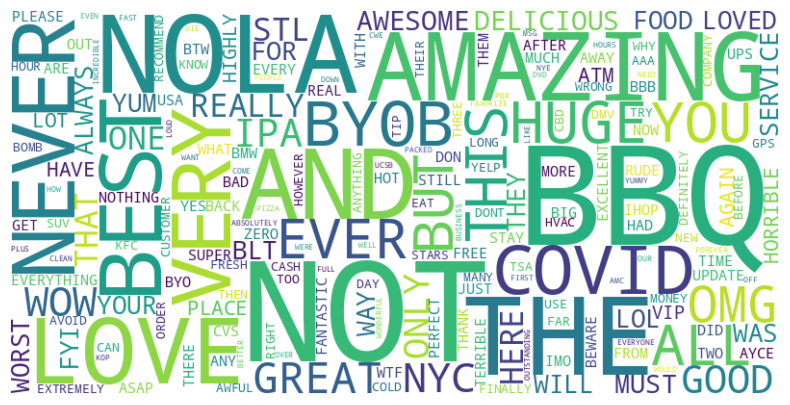

In [ ]:
# 생성
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(word_counts)

# 시각화
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear') # interpolation = 이미지를 좀 부드럽게 만드는?
plt.axis("off")
plt.show()

# Review Clustering

## K-Means 클러스터링

### 설치 및 import

In [ ]:
!pip install scikit-learn

In [ ]:
import polars as pl
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
review_path = "/content/yelp_academic_dataset_review.json"
review_pl = pl.read_ndjson(review_path)
review_df = review_pl.to_pandas()

In [ ]:
# 샘플링
sample_review_df = review_df.sample(n=100000, random_state = 42)

In [ ]:
# 텍스트 데이터 벡터화(TF-IDF)
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(review_df['text'])

# KMeans 클러스터링 적용
num_clusters = 5
km = KMeans(n_clusters = num_clusters, random_state = 42)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

# 클러스터 결과를 데이터 프레임에 추가
review_df['cluster'] = clusters

# PCA로 차원 축소(시각화를 위함)
pca = PCA(n_components = 2, random_state = 42)
principal_components = pca.fit_transform(tfidf_matrix.toarray())

# PCA 결과를 DF에 추가
review_df['pca_x'] = principal_components[:, 0]
review_df['pca_y'] = principal_components[:, 1]

# 클러스터링 결과 시각화
plt.figure(figsize = (10, 6))
scatter = plt.scatter(review_df['pca1'], review_df['pca2'], c=review_df['cluster'], cmap='viridis')
plt.title('K-Means Clustering of Reviews')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label = 'Cluster')
plt.show()

# 클러스터 별 리뷰 개수 확인
print(review_df['cluster'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
